# Volume 3: Pandas 3 (Grouping)
    <Name>
    <Class>
    <Date>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

The data *time_usage.txt* contains data on how Americans spend their time from 2007-2017.
Read in the data as a DataFrame object and use groupby() to filter through the DataFrame and answer the following questions:

1. How did the mean amount of time spent on all activities change over 2007 to 2017?

2. On average (using the mean), did Americans spend more time doing exercise or watching TV  over the past ten years? What was the difference?

(Hint: The column *Estimate* gives the amount of hours spent on an activity. The activity *Watching TV* contains data on Americans watching TV and the activity *Participating in Sports Exercise and Rec Activity* contains data on Americans exercising.)

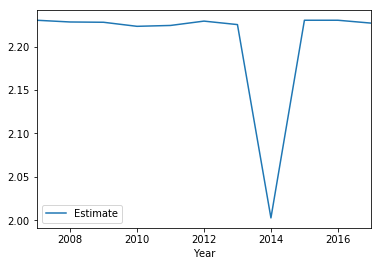

In [3]:
timeusage = pd.read_csv('time_usage.txt')
a = timeusage.groupby("Year").mean()
a.plot(y = "Estimate")
plt.show()

In [4]:
grouped_time = timeusage.groupby("Activity").mean()

## Problem 2

Use the time usage data to answer the following questions. Support your claims with readable, labeled visualizations.

1. In what activity did Americans spend most of their time in 2017?

2. In what year did Watching TV increase the most? What about Volunteering?

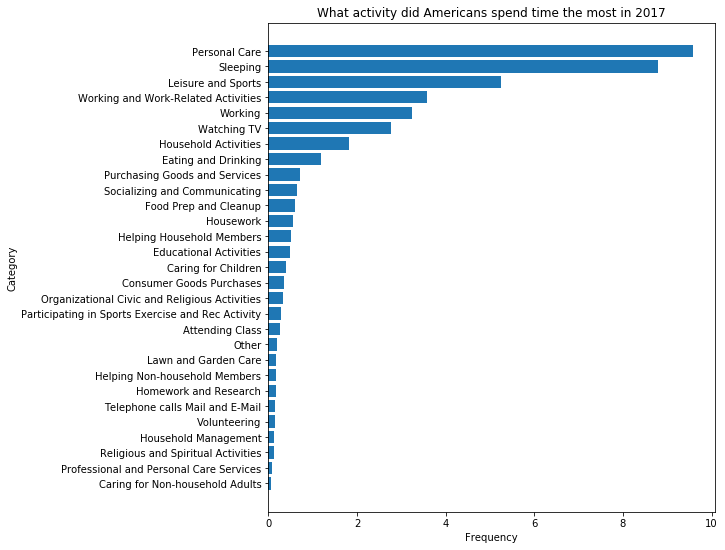

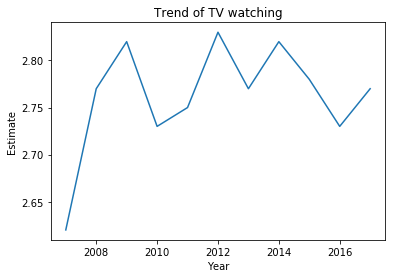

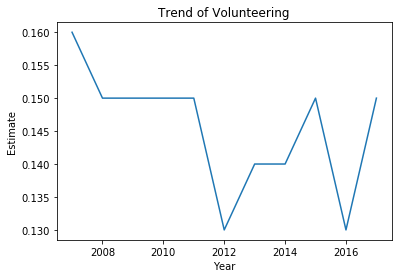

In [5]:
prob2df = timeusage[(timeusage["Year"] == 2017) & (timeusage["Activity"] != "Total Hours")][["Activity","Estimate"]].sort_values("Estimate")

plt.figure(figsize=(8,9))
plt.barh(prob2df["Activity"], prob2df["Estimate"])
plt.title("What activity did Americans spend time the most in 2017")
plt.ylabel("Category")
plt.xlabel("Frequency")
plt.show()

tv = timeusage[timeusage["Activity"] == "Watching TV"][["Year", "Estimate"]]
volunteering = timeusage[timeusage["Activity"] == "Volunteering"][["Year", "Estimate"]]

plt.subplot(111)
plt.plot(tv["Year"], tv["Estimate"])
plt.title("Trend of TV watching")
plt.xlabel("Year")
plt.ylabel("Estimate")
plt.show()

plt.subplot(111)
plt.plot(volunteering["Year"], volunteering["Estimate"])
plt.title("Trend of Volunteering")
plt.xlabel("Year")
plt.ylabel("Estimate")
plt.show()

## Problem 3

The file *Ohio_1999.csv* contains data on workers in Ohio in the year 1999. Use pivot tables to answer the following questions:

1. What was the highest paid race/sex combination? What was the lowest paid?

2. What race/sex combination worked the least amount of hours? What from the data explains why?

3. What race/sex combination works the most hours per week per person?

Some useful keys for the information are:

1. In column *Sex*, {1: male, 2: female}

2. In column *Race*, {1: White, 2: African-American, 3: Native American/Eskimo, 4: Asian}

In [6]:
ohio = pd.read_csv('Ohio_1999.csv')
ohio.head()

,Usual Weekly Earnings,Usual Hours Worked,Age,Educational Attainment,Race,Sex,Yearly Salary
0,858,40,29,40,1,1,44000
1,0,35,57,39,1,2,12000
2,0,70,69,37,1,1,54000
3,0,40,30,43,1,1,48200
4,0,38,44,39,1,1,24000


In [7]:
'''What was the highest paid race/sex combination? What was the lowest paid?'''
ohio.pivot_table(values=['Yearly Salary'], index=['Race'], columns=['Sex'], aggfunc=[np.mean, np.min, np.max])

mean                        amin                 amax        
     Yearly Salary               Yearly Salary        Yearly Salary        
Sex              1             2             1      2             1       2
Race                                                                       
1     47564.566745  30867.947917             0      0        348516  422204
2     32872.067797  26615.897059             0      0        160000   83500
3     53000.000000  29000.000000         47000  29000         60000   29000
4     54347.066667  36477.777778         11000   3000        306731   80000

In [14]:
'''What race/sex combination worked the least amount of hours? What from the data explains why?'''
ohio.pivot_table(values=['Usual Hours Worked'], index=['Race'], columns=['Sex'], aggfunc=[np.mean, np.min, np.max])
print("African and American Female worked the least amount of hours")

mean                          amin                   amax  \
     Usual Hours Worked            Usual Hours Worked     Usual Hours Worked   
Sex                   1          2                  1   2                  1   
Race                                                                           
1             43.254098  40.512153                  0   0                 99   
2             40.372881  38.000000                  0   0                 80   
3             48.666667  40.000000                 40  40                 55   
4             38.666667  40.555556                  0  40                 60   

          
          
Sex    2  
Race      
1     98  
2     62  
3     40  
4     45

## Problem 4

Use the employment data from Ohio in 1999 to answer the following questions:

1. The column *Educational Attainment* contains numbers 0-46. Any number less than 39 means the person did not get any form of degree. 39-42 refers to either a high-school or associate's degree. A number greater than 43 means the person got at least a bachelor's degree. What is the most common degree among workers?

2. Partition the *Age* column into 4 equally populated intervals. Which interval contains the most workers with no degree? A degree that is less than a bachelor's degree? A bachelor's degree or higher?

3. What age/degree combination has the greatest yearly salary on average?

In [15]:
ohio = pd.read_csv('Ohio_1999.csv')
education = pd.cut(ohio["Educational Attainment"],[0,38,42,46])
ohioEducation = ohio.groupby(education)


In [19]:
'''What is the most common degree among workers?'''
ohioEducation["Educational Attainment"].describe()[["count"]]

,count
Educational Attainment,
"(0, 38]",88.0
"(38, 42]",967.0
"(42, 46]",530.0


The common degree among workers is a highschool or an associate degree

In [24]:
'''
Partition the Age column into four equally populated intervals, which interval contains the most workers with no degree?
A degree that is less than a bachelor's degree? BS degree? or higher?
'''

age = pd.qcut(ohio["Age"], 4)
ohioAge = ohio.pivot_table(values = "Yearly Salary", index = [age,education], aggfunc = "count")
ohioAge

Yearly Salary
Age            Educational Attainment               
(15.999, 32.0] (0, 38]                            24
               (38, 42]                          276
               (42, 46]                          130
(32.0, 40.0]   (0, 38]                            17
               (38, 42]                          222
               (42, 46]                          141
(40.0, 49.0]   (0, 38]                            21
               (38, 42]                          250
               (42, 46]                          139
(49.0, 85.0]   (0, 38]                            26
               (38, 42]                          219
               (42, 46]                          120

The group aged 49-85 contains the most workers with no degree
The group aged 33-40 is the group with the most number of bachelor's degree
The group aged 16-32 is the group with the most number with less/no degree

## Problem 5

The *pydataset* contains a data set *iris*, which contains the measurements of various flower species.
Use this data to answer the following questions:

1. Which flower species is the easiest distinguish and why?

2. What is the correlation between petal and sepal size for each species?

In [11]:
!pip install pydataset
from pydataset import data

initiated datasets repo at: C:\Users\jjuachon\.pydataset/


In [25]:
from pydataset import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


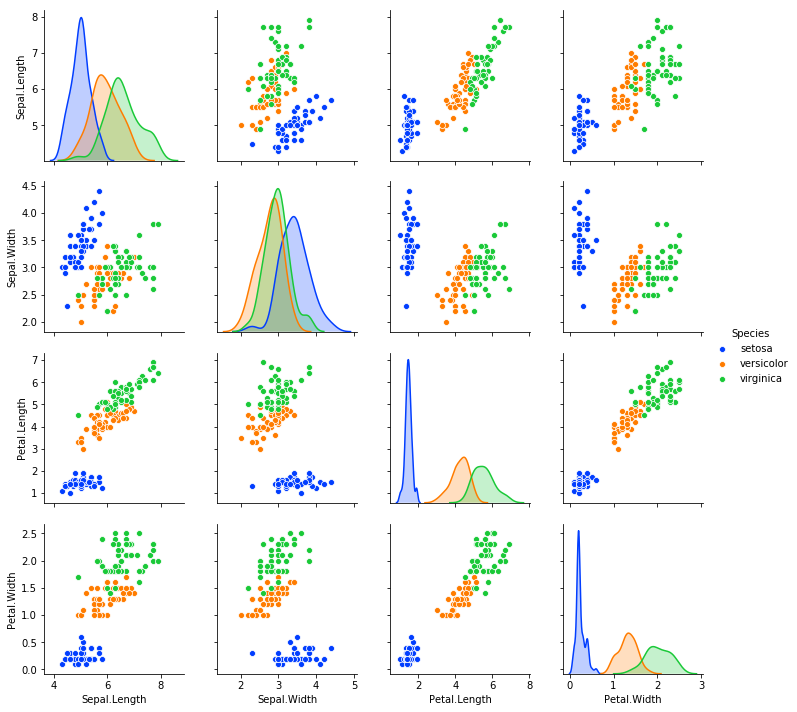

In [26]:
'''Which flower species is the easiest to distinguish and why?'''
import seaborn as sns
sns.pairplot(iris, hue="Species",palette="bright")
plt.show()

The plot above shows that SETOSA is easier to distinguish since it has it's own cluster compared to the two which is overlapping

In [30]:
iris['petal_size'] = iris['Petal.Length'].values * iris['Petal.Width'].values
iris['sepal_size'] = iris['Sepal.Length'].values * iris['Sepal.Width'].values
irisPetalSepal = iris[['Species', 'petal_size', 'sepal_size']].groupby('Species').corr()['petal_size'].reset_index()
irisPetalSepalCorr = irisPetalSepal[irisPetalSepal['level_1'] != 'petal_size'][['Species','petal_size']]
irisPetalSepalCorr.columns = ['Species', 'Correlation']
irisPetalSepalCorr

,Species,Correlation
1,setosa,0.282434
3,versicolor,0.731901
5,virginica,0.696012
